In [1]:
import keras
import tensorflow
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd

from google.colab import drive
#drive.flush_and_unmount()
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/My Drive/Fac/DL2/validation_z.zip" -d "/content"

In [ ]:
!unzip "/content/drive/My Drive/Fac/DL2/training_z.zip" -d "/content"


In [ ]:
!unzip "/content/drive/My Drive/Fac/DL2/testing_z.zip" -d "/content"


In [3]:
train_dir = '/content/training/'
val_dir = '/content/validation/'
test_dir = '/content/testing/'

In [2]:
!pip install q keras==3.2.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 13.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is incompatible.


In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import os
import requests
import shutil
import random
from math import floor
from PIL import Image

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

import matplotlib.pyplot as plt

### 1. Base model -> overfitted quickly, low val_f1

In [ ]:
original_dataset_dir = 'C:/Users/afspf/Documents/FAC/2nd semester/DL/Project/DL2-20240415T103059Z-002_1/DL2/main_filepath'
val_dir = 'C:/Users/afspf/Documents/FAC/2nd semester/DL/Project/DL2-20240415T103059Z-002_1/DL2/validation'
test_dir = 'C:/Users/afspf/Documents/FAC/2nd semester/DL/Project/DL2-20240415T103059Z-002_1/DL2/testing'
train_dir = 'C:/Users/afspf/Documents/FAC/2nd semester/DL/Project/DL2-20240415T103059Z-002_1/DL2/training'

In [ ]:
train_datagen = ImageDataGenerator (rescale=1./255)
test_datagen = ImageDataGenerator (rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(290, 192),
                                                    batch_size=64,
                                                    class_mode= 'categorical'
                                                    )

validation_generator = test_datagen.flow_from_directory (val_dir,
                                                        target_size=(290, 192),
                                                         batch_size=64,
                                                         class_mode='categorical',
                                                         shuffle=False)

Found 12337 images belonging to 114 classes.
Found 2421 images belonging to 114 classes.


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(256, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))

model.add(layers.Dense(114, activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.metrics import F1Score

model.compile(loss='categorical_crossentropy',
              #optimizer=optimizers.RMSprop(learning_rate=1e-4),
              optimizer = optimizers.Adam(1e-4),
              metrics=['accuracy', F1Score(average='weighted', name = "f1_score")])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=2,  restore_best_weights=True)
history = model.fit(
    train_generator,    epochs = 20,
    validation_data = validation_generator,
    verbose=1,
    callbacks=[es])

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


193/193 ━━━━━━━━━━━━━━━━━━━━ 67s 319ms/step - accuracy: 0.0328 - f1_score: 0.0085 - loss: 4.5626 - val_accuracy: 0.0500 - val_f1_score: 0.0166 - val_loss: 4.4045
Epoch 2/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 60s 299ms/step - accuracy: 0.0631 - f1_score: 0.0291 - loss: 4.3351 - val_accuracy: 0.0710 - val_f1_score: 0.0371 - val_loss: 4.2423
Epoch 3/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 61s 309ms/step - accuracy: 0.1015 - f1_score: 0.0651 - loss: 4.0761 - val_accuracy: 0.0987 - val_f1_score: 0.0703 - val_loss: 4.1150
Epoch 4/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 62s 309ms/step - accuracy: 0.1457 - f1_score: 0.1135 - loss: 3.7868 - val_accuracy: 0.1169 - val_f1_score: 0.0908 - val_loss: 4.0512
Epoch 5/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 61s 308ms/step - accuracy: 0.2213 - f1_score: 0.1984 - loss: 3.4111 - val_accuracy: 0.1338 - val_f1_score: 0.1091 - val_loss: 4.0317
Epoch 6/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 60s 303ms/step - accuracy: 0.3008 - f1_score: 0.2842 - loss: 2.9917 - val_accuracy: 0.1301 - val_f1_score:

### 2. Added class weights and a new layer -> overfitted quickly, low val_f1

- Something is def. wrong with class weights, will inspect this later

In [ ]:
original_dataset_dir = 'C:/Users/afspf/Documents/FAC/2nd semester/DL/Project/DL2-20240415T103059Z-002_1/DL2/main_filepath'
val_dir = 'C:/Users/afspf/Documents/FAC/2nd semester/DL/Project/DL2-20240415T103059Z-002_1/DL2/validation'
test_dir = 'C:/Users/afspf/Documents/FAC/2nd semester/DL/Project/DL2-20240415T103059Z-002_1/DL2/testing'
train_dir = 'C:/Users/afspf/Documents/FAC/2nd semester/DL/Project/DL2-20240415T103059Z-002_1/DL2/training'

In [ ]:
import os
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = os.listdir(train_dir)
class_counts = {}

for _class in classes:
    class_counts[_class] = len(os.listdir(os.path.join(train_dir, _class)))

labels = [item for item, count in class_counts.items() for i in range(count)]
class_weights = compute_class_weight('balanced', classes=np.unique(labels), y=labels)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}


In [ ]:
train_datagen = ImageDataGenerator (rescale=1./255)
test_datagen = ImageDataGenerator (rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    #target_size=(130, 69),
                                                    target_size=(290, 192),
                                                    batch_size=64,
                                                    class_mode= 'categorical'
                                                    )

validation_generator = test_datagen.flow_from_directory (val_dir,
                                                        #target_size= (130, 69),
                                                        target_size=(290, 192),
                                                         batch_size=64,
                                                         class_mode='categorical',
                                                         shuffle=False)

Found 12337 images belonging to 114 classes.
Found 2421 images belonging to 114 classes.


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(256, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))

model.add(layers.Dense(114, activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.metrics import F1Score

model.compile(loss='categorical_crossentropy',
              #optimizer=optimizers.RMSprop(learning_rate=1e-4),
              optimizer = optimizers.Adam(1e-4),
              metrics=['accuracy', F1Score(average='weighted', name = "f1_score")])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=2,  restore_best_weights=True)
history = model.fit(
    train_generator,    epochs = 20,
    validation_data = validation_generator,
    verbose=1,
    callbacks=[es])

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


193/193 ━━━━━━━━━━━━━━━━━━━━ 66s 317ms/step - accuracy: 0.0371 - f1_score: 0.0099 - loss: 4.5536 - val_accuracy: 0.0587 - val_f1_score: 0.0225 - val_loss: 4.3826
Epoch 2/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 61s 307ms/step - accuracy: 0.0657 - f1_score: 0.0314 - loss: 4.3250 - val_accuracy: 0.0710 - val_f1_score: 0.0385 - val_loss: 4.2184
Epoch 3/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 60s 301ms/step - accuracy: 0.0990 - f1_score: 0.0665 - loss: 4.0962 - val_accuracy: 0.0888 - val_f1_score: 0.0644 - val_loss: 4.1036
Epoch 4/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 61s 304ms/step - accuracy: 0.1350 - f1_score: 0.1044 - loss: 3.8403 - val_accuracy: 0.1194 - val_f1_score: 0.0913 - val_loss: 3.9939
Epoch 5/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 61s 308ms/step - accuracy: 0.2015 - f1_score: 0.1734 - loss: 3.5313 - val_accuracy: 0.1322 - val_f1_score: 0.1077 - val_loss: 3.9336
Epoch 6/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 61s 307ms/step - accuracy: 0.2711 - f1_score: 0.2531 - loss: 3.1651 - val_accuracy: 0.1380 - val_f1_score:

### 3. Added a new layer with 256 neurons + dropout due to overfit -> has a lower val_f1 -> more promising results

In [ ]:
original_dataset_dir = 'C:/Users/afspf/Documents/FAC/2nd semester/DL/Project/DL2-20240415T103059Z-002_1/DL2/main_filepath'
val_dir = 'C:/Users/afspf/Documents/FAC/2nd semester/DL/Project/DL2-20240415T103059Z-002_1/DL2/validation'
test_dir = 'C:/Users/afspf/Documents/FAC/2nd semester/DL/Project/DL2-20240415T103059Z-002_1/DL2/testing'
train_dir = 'C:/Users/afspf/Documents/FAC/2nd semester/DL/Project/DL2-20240415T103059Z-002_1/DL2/training'

In [ ]:
train_datagen = ImageDataGenerator (rescale=1./255)
test_datagen = ImageDataGenerator (rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(290, 192),
                                                    batch_size=64,
                                                    class_mode= 'categorical'
                                                    )

validation_generator = test_datagen.flow_from_directory (val_dir,
                                                        target_size=(290, 192),
                                                         batch_size=64,
                                                         class_mode='categorical',
                                                         shuffle=False)

Found 12337 images belonging to 114 classes.
Found 2421 images belonging to 114 classes.


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(Dropout(0.25))
model.add(layers.Conv2D(256, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(Dropout(0.4))
model.add(layers.Dense(114, activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.metrics import F1Score

model.compile(loss='categorical_crossentropy',
              #optimizer=optimizers.RMSprop(learning_rate=1e-4),
              optimizer = optimizers.Adam(1e-4),
              metrics=['accuracy', F1Score(average='weighted', name = "f1_score")])

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', patience=2,  restore_best_weights=True)

In [ ]:
history = model.fit(
    train_generator,    epochs = 20,
    validation_data = validation_generator,
    verbose=1,
    callbacks=[es])

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


193/193 ━━━━━━━━━━━━━━━━━━━━ 100s 407ms/step - accuracy: 0.0299 - f1_score: 0.0107 - loss: 4.6081 - val_accuracy: 0.0368 - val_f1_score: 0.0075 - val_loss: 4.5591
Epoch 2/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 62s 311ms/step - accuracy: 0.0429 - f1_score: 0.0167 - loss: 4.4910 - val_accuracy: 0.0529 - val_f1_score: 0.0228 - val_loss: 4.4377
Epoch 3/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 61s 307ms/step - accuracy: 0.0576 - f1_score: 0.0293 - loss: 4.3646 - val_accuracy: 0.0789 - val_f1_score: 0.0381 - val_loss: 4.2670
Epoch 4/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 61s 308ms/step - accuracy: 0.0792 - f1_score: 0.0457 - loss: 4.2329 - val_accuracy: 0.0867 - val_f1_score: 0.0567 - val_loss: 4.2109
Epoch 5/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 62s 309ms/step - accuracy: 0.0982 - f1_score: 0.0685 - loss: 4.1037 - val_accuracy: 0.1062 - val_f1_score: 0.0714 - val_loss: 4.1238
Epoch 6/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 62s 311ms/step - accuracy: 0.1166 - f1_score: 0.0871 - loss: 3.9737 - val_accuracy: 0.1227 - val_f1_score

### 4. Added one more layer with 512 neurons + dropout -> val_f1 of 0.1340 (without overfitting)

In [ ]:
original_dataset_dir = 'C:/Users/afspf/Documents/FAC/2nd semester/DL/Project/DL2-20240415T103059Z-002_1/DL2/main_filepath'
val_dir = 'C:/Users/afspf/Documents/FAC/2nd semester/DL/Project/DL2-20240415T103059Z-002_1/DL2/validation'
test_dir = 'C:/Users/afspf/Documents/FAC/2nd semester/DL/Project/DL2-20240415T103059Z-002_1/DL2/testing'
train_dir = 'C:/Users/afspf/Documents/FAC/2nd semester/DL/Project/DL2-20240415T103059Z-002_1/DL2/training'

In [ ]:
train_datagen = ImageDataGenerator (rescale=1./255)
test_datagen = ImageDataGenerator (rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    #target_size=(130, 69),
                                                    target_size=(290, 192),
                                                    batch_size=64,
                                                    class_mode= 'categorical'
                                                    )

validation_generator = test_datagen.flow_from_directory (val_dir,
                                                        #target_size= (130, 69),
                                                        target_size=(290, 192),
                                                         batch_size=64,
                                                         class_mode='categorical',
                                                         shuffle=False)

Found 12340 images belonging to 114 classes.
Found 2419 images belonging to 114 classes.


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(Dropout(0.25))
model.add(layers.Conv2D(256, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(Dropout(0.3))
model.add(layers.Conv2D(512, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(Dropout(0.4))
model.add(layers.Dense(114, activation = 'softmax'))

c:\Users\afspf\anaconda3\envs\DL\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.metrics import F1Score

model.compile(loss='categorical_crossentropy',
              #optimizer=optimizers.RMSprop(learning_rate=1e-4),
              optimizer = optimizers.Adam(1e-4),
              metrics=['accuracy', F1Score(average='weighted', name = "f1_score")])

In [ ]:
history = model.fit(
    train_generator,    epochs = 20,
    validation_data = validation_generator,
    verbose=1)


Epoch 1/20


c:\Users\afspf\anaconda3\envs\DL\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


193/193 ━━━━━━━━━━━━━━━━━━━━ 355s 2s/step - accuracy: 0.0304 - f1_score: 0.0103 - loss: 4.5992 - val_accuracy: 0.0401 - val_f1_score: 0.0031 - val_loss: 4.5776
Epoch 2/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 366s 2s/step - accuracy: 0.0377 - f1_score: 0.0123 - loss: 4.5199 - val_accuracy: 0.0599 - val_f1_score: 0.0188 - val_loss: 4.4640
Epoch 3/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 381s 2s/step - accuracy: 0.0485 - f1_score: 0.0199 - loss: 4.4467 - val_accuracy: 0.0682 - val_f1_score: 0.0352 - val_loss: 4.3458
Epoch 4/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 376s 2s/step - accuracy: 0.0585 - f1_score: 0.0329 - loss: 4.3438 - val_accuracy: 0.0765 - val_f1_score: 0.0459 - val_loss: 4.2813
Epoch 5/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 375s 2s/step - accuracy: 0.0793 - f1_score: 0.0500 - loss: 4.2256 - val_accuracy: 0.0901 - val_f1_score: 0.0565 - val_loss: 4.1804
Epoch 6/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 383s 2s/step - accuracy: 0.0932 - f1_score: 0.0631 - loss: 4.0934 - val_accuracy: 0.0988 - val_f1_score: 0.0704 - va

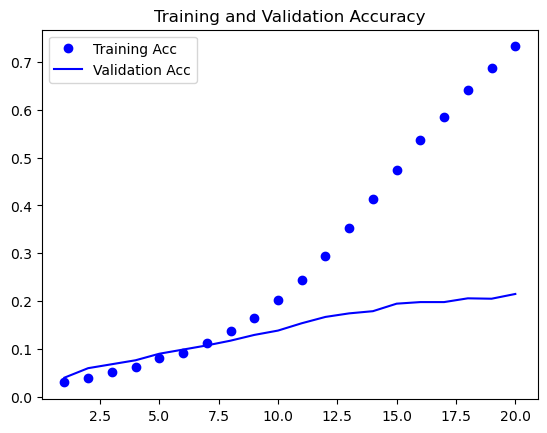

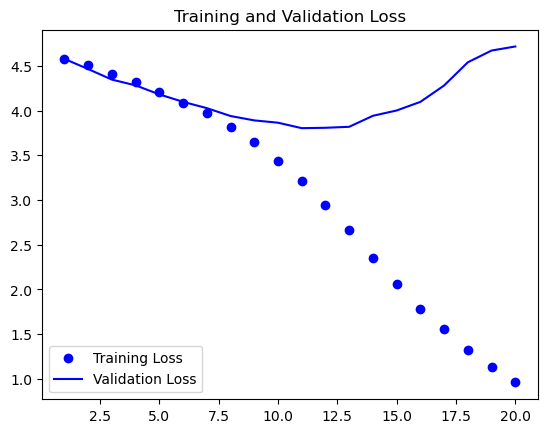

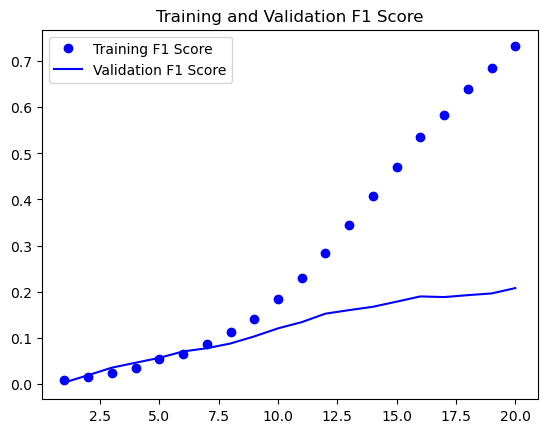

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
f1_score = history.history['f1_score']
val_f1_score = history.history['val_f1_score']

epochs = list(range(1, len(acc) + 1))

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.plot(epochs, f1_score, 'bo', label='Training F1 Score')
plt.plot(epochs, val_f1_score, 'b', label='Validation F1 Score')
plt.title('Training and Validation F1 Score')
plt.legend()
plt.show()


### 5. Added one more layer with 1024 neurons + dropouts -> val_f1 of 0.1538 (without overfitting)

In [ ]:
original_dataset_dir = 'C:/Users/afspf/Documents/FAC/2nd semester/DL/Project/DL2-20240415T103059Z-002_1/DL2/main_filepath'
val_dir = 'C:/Users/afspf/Documents/FAC/2nd semester/DL/Project/DL2-20240415T103059Z-002_1/DL2/validation'
test_dir = 'C:/Users/afspf/Documents/FAC/2nd semester/DL/Project/DL2-20240415T103059Z-002_1/DL2/testing'
train_dir = 'C:/Users/afspf/Documents/FAC/2nd semester/DL/Project/DL2-20240415T103059Z-002_1/DL2/training'

In [ ]:
train_datagen = ImageDataGenerator (rescale=1./255)
test_datagen = ImageDataGenerator (rescale=1./255)


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(290, 192),
                                                    batch_size=64,
                                                    class_mode= 'categorical'
                                                    )

validation_generator = test_datagen.flow_from_directory (val_dir,
                                                        target_size=(290, 192),
                                                         batch_size=64,
                                                         class_mode='categorical',
                                                         shuffle=False)


Found 12340 images belonging to 114 classes.
Found 2419 images belonging to 114 classes.


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(Dropout(0.25))
model.add(layers.Conv2D(256, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(Dropout(0.3))
model.add(layers.Conv2D(512, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(Dropout(0.35))
model.add(layers.Conv2D(1024, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(Dropout(0.4))
model.add(layers.Dense(114, activation = 'softmax'))

In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.metrics import F1Score

model.compile(loss='categorical_crossentropy',
              #optimizer=optimizers.RMSprop(learning_rate=1e-4),
              optimizer = optimizers.Adam(1e-4),
              metrics=['accuracy', F1Score(average='weighted', name = "f1_score")])

In [ ]:
history = model.fit(
    train_generator,    epochs = 20,
    validation_data = validation_generator,
    verbose=1)

Epoch 1/20


c:\Users\afspf\anaconda3\envs\DL\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


193/193 ━━━━━━━━━━━━━━━━━━━━ 8012s 42s/step - accuracy: 0.0300 - f1_score: 0.0091 - loss: 4.6208 - val_accuracy: 0.0401 - val_f1_score: 0.0031 - val_loss: 4.6126
Epoch 2/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 552s 3s/step - accuracy: 0.0338 - f1_score: 0.0101 - loss: 4.5543 - val_accuracy: 0.0384 - val_f1_score: 0.0052 - val_loss: 4.5911
Epoch 3/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 520s 3s/step - accuracy: 0.0344 - f1_score: 0.0105 - loss: 4.5228 - val_accuracy: 0.0438 - val_f1_score: 0.0086 - val_loss: 4.5079
Epoch 4/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 597s 3s/step - accuracy: 0.0497 - f1_score: 0.0201 - loss: 4.4660 - val_accuracy: 0.0674 - val_f1_score: 0.0289 - val_loss: 4.3632
Epoch 5/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 573s 3s/step - accuracy: 0.0584 - f1_score: 0.0296 - loss: 4.3584 - val_accuracy: 0.0728 - val_f1_score: 0.0339 - val_loss: 4.3247
Epoch 6/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 446s 2s/step - accuracy: 0.0663 - f1_score: 0.0380 - loss: 4.2677 - val_accuracy: 0.0876 - val_f1_score: 0.0540 - 

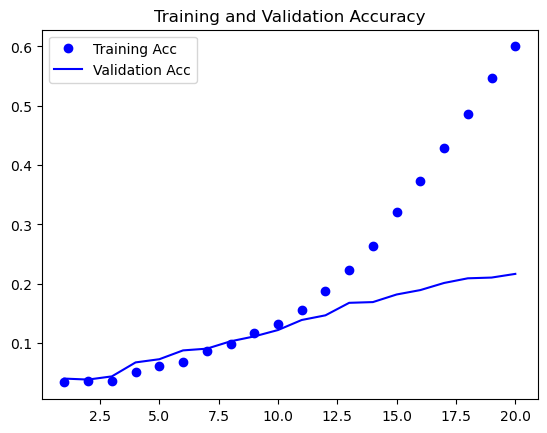

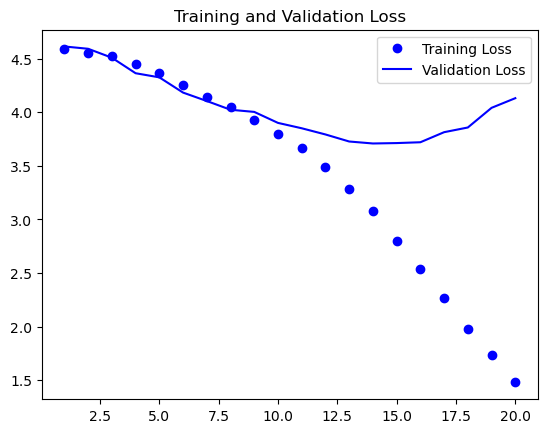

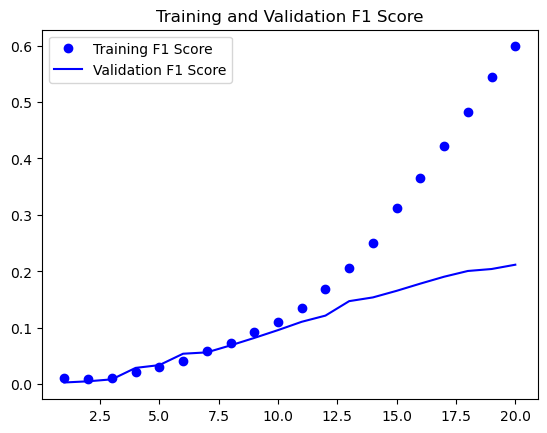

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
f1_score = history.history['f1_score']
val_f1_score = history.history['val_f1_score']

epochs = list(range(1, len(acc) + 1))

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.plot(epochs, f1_score, 'bo', label='Training F1 Score')
plt.plot(epochs, val_f1_score, 'b', label='Validation F1 Score')
plt.title('Training and Validation F1 Score')
plt.legend()
plt.show()


### 6. Using class weights with new best model -> lower values for val_f1

- Conclusion: probably something is wrong with how we are applying class weights.

First we checked how much there was a class imbalance

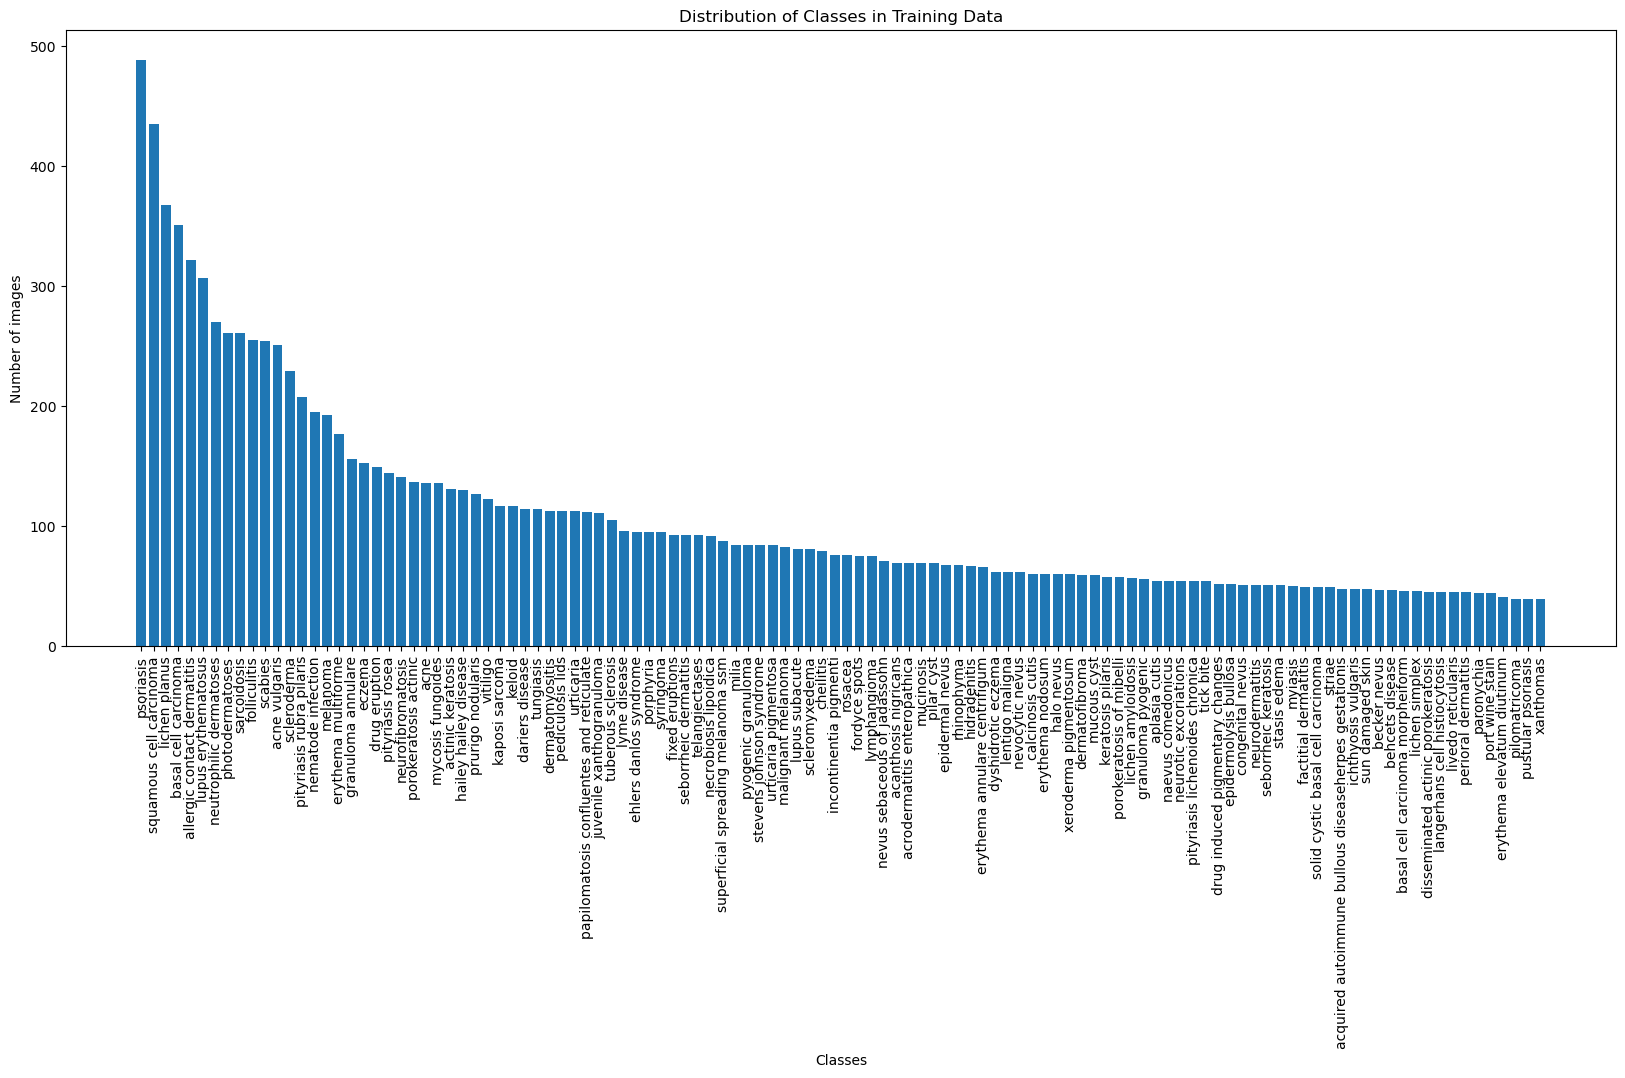

In [ ]:
import os
import matplotlib.pyplot as plt

def plot_class_distribution(train_dir):
    class_counts = {}
    classes = os.listdir(train_dir)

    for class_name in classes:
        class_path = os.path.join(train_dir, class_name)

        if os.path.isdir(class_path):
            num_files = len(os.listdir(class_path))
            class_counts[class_name] = num_files

    sorted_class_counts = dict(sorted(class_counts.items(), key=lambda item: item[1], reverse=True))

    plt.figure(figsize=(20, 8))
    plt.bar(range(len(sorted_class_counts)), list(sorted_class_counts.values()), align='center')
    plt.xticks(range(len(sorted_class_counts)), list(sorted_class_counts.keys()), rotation='vertical')
    plt.xlabel('Classes')
    plt.ylabel('Number of images')
    plt.title('Distribution of Classes in Training Data')
    plt.show()

plot_class_distribution(train_dir)


In [ ]:
import os
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = os.listdir(train_dir)

image_counts = []

for class_name in classes:
    class_dir = os.path.join(train_dir, class_name)
    num_images = len(os.listdir(class_dir))
    image_counts.append(num_images)

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(classes),
    y=np.repeat(classes, image_counts)
)

class_weights_dic = {i: weight for i, weight in enumerate(class_weights)}


In [ ]:
original_dataset_dir = 'C:/Users/afspf/Documents/FAC/2nd semester/DL/Project/DL2-20240415T103059Z-002_1/DL2/main_filepath'
val_dir = 'C:/Users/afspf/Documents/FAC/2nd semester/DL/Project/DL2-20240415T103059Z-002_1/DL2/validation'
test_dir = 'C:/Users/afspf/Documents/FAC/2nd semester/DL/Project/DL2-20240415T103059Z-002_1/DL2/testing'
train_dir = 'C:/Users/afspf/Documents/FAC/2nd semester/DL/Project/DL2-20240415T103059Z-002_1/DL2/training'

In [ ]:
train_datagen = ImageDataGenerator (rescale=1./255)
test_datagen = ImageDataGenerator (rescale=1./255)


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(290, 192),
                                                    batch_size=64,
                                                    class_mode= 'categorical'
                                                    )

validation_generator = test_datagen.flow_from_directory (val_dir,
                                                        target_size=(290, 192),
                                                         batch_size=64,
                                                         class_mode='categorical',
                                                         shuffle=False)


Found 12337 images belonging to 114 classes.
Found 2421 images belonging to 114 classes.


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(Dropout(0.25))
model.add(layers.Conv2D(256, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(Dropout(0.3))
model.add(layers.Conv2D(512, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(Dropout(0.35))
model.add(layers.Conv2D(1024, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(Dropout(0.4))
model.add(layers.Dense(114, activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.metrics import F1Score

model.compile(loss='categorical_crossentropy',
              #optimizer=optimizers.RMSprop(learning_rate=1e-4),
              optimizer = optimizers.Adam(1e-4),
              metrics=['accuracy', F1Score(average='weighted', name = "f1_score")])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=2,  restore_best_weights=True)
history = model.fit(
    train_generator,    epochs = 20,
    validation_data = validation_generator,
    verbose=1,
    callbacks=[es])


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


193/193 ━━━━━━━━━━━━━━━━━━━━ 80s 354ms/step - accuracy: 0.0310 - f1_score: 0.0097 - loss: 4.6234 - val_accuracy: 0.0359 - val_f1_score: 0.0025 - val_loss: 4.5755
Epoch 2/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 62s 310ms/step - accuracy: 0.0314 - f1_score: 0.0102 - loss: 4.5472 - val_accuracy: 0.0401 - val_f1_score: 0.0031 - val_loss: 4.5601
Epoch 3/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 61s 305ms/step - accuracy: 0.0324 - f1_score: 0.0100 - loss: 4.5384 - val_accuracy: 0.0413 - val_f1_score: 0.0057 - val_loss: 4.5315
Epoch 4/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 61s 306ms/step - accuracy: 0.0413 - f1_score: 0.0132 - loss: 4.5017 - val_accuracy: 0.0496 - val_f1_score: 0.0162 - val_loss: 4.4591
Epoch 5/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 61s 306ms/step - accuracy: 0.0497 - f1_score: 0.0231 - loss: 4.4062 - val_accuracy: 0.0508 - val_f1_score: 0.0217 - val_loss: 4.3602
Epoch 6/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 61s 306ms/step - accuracy: 0.0649 - f1_score: 0.0367 - loss: 4.3293 - val_accuracy: 0.0781 - val_f1_score:

### 7. Added one more layer with 2048 neurons + dropouts in order to try to improve val_f1 and reduce val_loss -> val_f1 of 0.171 (without overfitting)

In [ ]:
original_dataset_dir = 'C:/Users/afspf/Documents/FAC/2nd semester/DL/Project/DL2-20240415T103059Z-002_1/DL2/main_filepath'
val_dir = 'C:/Users/afspf/Documents/FAC/2nd semester/DL/Project/DL2-20240415T103059Z-002_1/DL2/validation'
test_dir = 'C:/Users/afspf/Documents/FAC/2nd semester/DL/Project/DL2-20240415T103059Z-002_1/DL2/testing'
train_dir = 'C:/Users/afspf/Documents/FAC/2nd semester/DL/Project/DL2-20240415T103059Z-002_1/DL2/training'

In [ ]:
train_datagen = ImageDataGenerator (rescale=1./255)
test_datagen = ImageDataGenerator (rescale=1./255)


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(290, 192),
                                                    batch_size=64,
                                                    class_mode= 'categorical'
                                                    )

validation_generator = test_datagen.flow_from_directory (val_dir,
                                                        target_size=(290, 192),
                                                         batch_size=64,
                                                         class_mode='categorical',
                                                         shuffle=False)


Found 12340 images belonging to 114 classes.
Found 2419 images belonging to 114 classes.


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(Dropout(0.25))
model.add(layers.Conv2D(256, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(Dropout(0.3))
model.add(layers.Conv2D(512, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(Dropout(0.35))
model.add(layers.Conv2D(1024, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(Dropout(0.4))
model.add(layers.Conv2D(2048, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(Dropout(0.4))
model.add(layers.Dense(114, activation = 'softmax'))

c:\Users\afspf\anaconda3\envs\DL\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.metrics import F1Score

model.compile(loss='categorical_crossentropy',
              #optimizer=optimizers.RMSprop(learning_rate=1e-4),
              optimizer = optimizers.Adam(1e-4),
              metrics=['accuracy', F1Score(average='weighted', name = "f1_score")])

In [ ]:
history = model.fit(
    train_generator,    epochs = 20,
    validation_data = validation_generator,
    verbose=1)

Epoch 1/20


c:\Users\afspf\anaconda3\envs\DL\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


193/193 ━━━━━━━━━━━━━━━━━━━━ 620s 3s/step - accuracy: 0.0339 - f1_score: 0.0106 - loss: 4.6125 - val_accuracy: 0.0409 - val_f1_score: 0.0049 - val_loss: 4.6494
Epoch 2/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 622s 3s/step - accuracy: 0.0331 - f1_score: 0.0097 - loss: 4.5427 - val_accuracy: 0.0360 - val_f1_score: 0.0025 - val_loss: 4.5723
Epoch 3/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 592s 3s/step - accuracy: 0.0400 - f1_score: 0.0103 - loss: 4.5198 - val_accuracy: 0.0401 - val_f1_score: 0.0031 - val_loss: 4.5750
Epoch 4/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 585s 3s/step - accuracy: 0.0405 - f1_score: 0.0114 - loss: 4.5189 - val_accuracy: 0.0426 - val_f1_score: 0.0059 - val_loss: 4.4978
Epoch 5/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 600s 3s/step - accuracy: 0.0356 - f1_score: 0.0108 - loss: 4.5039 - val_accuracy: 0.0467 - val_f1_score: 0.0106 - val_loss: 4.4854
Epoch 6/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 718s 4s/step - accuracy: 0.0473 - f1_score: 0.0179 - loss: 4.4400 - val_accuracy: 0.0533 - val_f1_score: 0.0164 - va

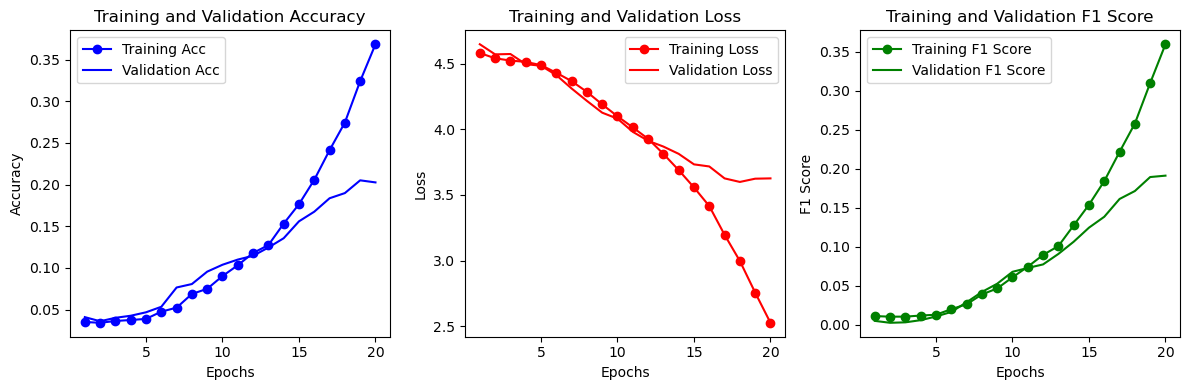

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
f1_score = history.history['f1_score']
val_f1_score = history.history['val_f1_score']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(epochs, acc, 'bo-', label='Training Acc')
plt.plot(epochs, val_acc, 'b-', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(epochs, loss, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(epochs, f1_score, 'go-', label='Training F1 Score')
plt.plot(epochs, val_f1_score, 'g-', label='Validation F1 Score')
plt.title('Training and Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()


### 8. Changing best model with AvgPooling -> worse results

In [8]:
train_datagen = ImageDataGenerator (rescale=1./255)
val_datagen = ImageDataGenerator (rescale=1./255)



train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(290, 192),
                                                    batch_size=64,
                                                    class_mode= 'categorical'
                                                    )

validation_generator = val_datagen.flow_from_directory (val_dir,
                                                        target_size=(290, 192),
                                                         batch_size=64,
                                                         class_mode='categorical',
                                                         shuffle=False)

Found 12337 images belonging to 114 classes.
Found 2421 images belonging to 114 classes.


In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.AveragePooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.AveragePooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.AveragePooling2D((2,2)))

model.add(Dropout(0.25))
model.add(layers.Conv2D(256, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.AveragePooling2D((2,2)))

model.add(Dropout(0.3))
model.add(layers.Conv2D(512, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.AveragePooling2D((2,2)))

model.add(Dropout(0.35))
model.add(layers.Conv2D(1024, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.AveragePooling2D((2,2)))

model.add(Dropout(0.4))
model.add(layers.Conv2D(2048, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.AveragePooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(Dropout(0.4))
model.add(layers.Dense(114, activation = 'softmax'))

In [12]:
from tensorflow.keras import optimizers
from tensorflow.keras.metrics import F1Score
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model.compile(loss='categorical_crossentropy',
              #optimizer=optimizers.RMSprop(learning_rate=1e-4),
              optimizer = optimizers.Adam(1e-4),
              metrics=['accuracy', F1Score(average='weighted', name = "f1_score")])

es = EarlyStopping(monitor='val_loss', mode='min', patience=2,  restore_best_weights=True)

In [13]:
history = model.fit(
    train_generator,    epochs = 20,
    validation_data = validation_generator,
    verbose=1,
    callbacks=[es])

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


193/193 ━━━━━━━━━━━━━━━━━━━━ 129s 475ms/step - accuracy: 0.0303 - f1_score: 0.0104 - loss: 4.6441 - val_accuracy: 0.0401 - val_f1_score: 0.0031 - val_loss: 4.5220
Epoch 2/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 60s 302ms/step - accuracy: 0.0323 - f1_score: 0.0107 - loss: 4.5625 - val_accuracy: 0.0401 - val_f1_score: 0.0031 - val_loss: 4.5077
Epoch 3/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 60s 303ms/step - accuracy: 0.0367 - f1_score: 0.0107 - loss: 4.5443 - val_accuracy: 0.0401 - val_f1_score: 0.0031 - val_loss: 4.4996
Epoch 4/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 60s 302ms/step - accuracy: 0.0362 - f1_score: 0.0097 - loss: 4.5243 - val_accuracy: 0.0359 - val_f1_score: 0.0025 - val_loss: 4.5150
Epoch 5/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 60s 302ms/step - accuracy: 0.0343 - f1_score: 0.0093 - loss: 4.5342 - val_accuracy: 0.0359 - val_f1_score: 0.0025 - val_loss: 4.4894
Epoch 6/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 60s 302ms/step - accuracy: 0.0375 - f1_score: 0.0081 - loss: 4.5158 - val_accuracy: 0.0380 - val_f1_score

### 9. Trying Leaky relu
- Avoiding Dead Neurons
- faster and more effective learning on problems where activation sparsity is less desirable

In [14]:
train_datagen = ImageDataGenerator (rescale=1./255)
val_datagen = ImageDataGenerator (rescale=1./255)



train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(290, 192),
                                                    batch_size=64,
                                                    class_mode= 'categorical'
                                                    )

validation_generator = val_datagen.flow_from_directory (val_dir,
                                                        target_size=(290, 192),
                                                         batch_size=64,
                                                         class_mode='categorical',
                                                         shuffle=False)

Found 12337 images belonging to 114 classes.
Found 2421 images belonging to 114 classes.


In [15]:
from tensorflow.keras import models, layers
from tensorflow.keras.layers import LeakyReLU, Dropout

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), input_shape=(290, 192, 3), padding='same'))
model.add(LeakyReLU(alpha=0.01))
model.add(layers.AveragePooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), padding='same'))
model.add(LeakyReLU(alpha=0.01))
model.add(layers.AveragePooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), padding='same'))
model.add(LeakyReLU(alpha=0.01))
model.add(layers.AveragePooling2D((2,2)))

model.add(Dropout(0.25))
model.add(layers.Conv2D(256, (3,3), padding='same'))
model.add(LeakyReLU(alpha=0.01))
model.add(layers.AveragePooling2D((2,2)))

model.add(Dropout(0.3))
model.add(layers.Conv2D(512, (3,3), padding='same'))
model.add(LeakyReLU(alpha=0.01))
model.add(layers.AveragePooling2D((2,2)))

model.add(Dropout(0.35))
model.add(layers.Conv2D(1024, (3,3), padding='same'))
model.add(LeakyReLU(alpha=0.01))
model.add(layers.AveragePooling2D((2,2)))

model.add(Dropout(0.4))
model.add(layers.Conv2D(2048, (3,3), padding='same'))
model.add(LeakyReLU(alpha=0.01))
model.add(layers.AveragePooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.4))
model.add(layers.Dense(114, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [16]:
from tensorflow.keras import optimizers
from tensorflow.keras.metrics import F1Score
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model.compile(loss='categorical_crossentropy',
              #optimizer=optimizers.RMSprop(learning_rate=1e-4),
              optimizer = optimizers.Adam(1e-4),
              metrics=['accuracy', F1Score(average='weighted', name = "f1_score")])

es = EarlyStopping(monitor='val_loss', mode='min', patience=2,  restore_best_weights=True)

In [17]:
history = model.fit(
    train_generator,    epochs = 20,
    validation_data = validation_generator,
    verbose=1,
    callbacks=[es])

Epoch 1/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 95s 398ms/step - accuracy: 0.0313 - f1_score: 0.0109 - loss: 4.6253 - val_accuracy: 0.0359 - val_f1_score: 0.0025 - val_loss: 4.5434
Epoch 2/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 60s 303ms/step - accuracy: 0.0322 - f1_score: 0.0098 - loss: 4.5538 - val_accuracy: 0.0401 - val_f1_score: 0.0031 - val_loss: 4.4938
Epoch 3/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 59s 297ms/step - accuracy: 0.0354 - f1_score: 0.0096 - loss: 4.5199 - val_accuracy: 0.0401 - val_f1_score: 0.0031 - val_loss: 4.4873
Epoch 4/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 60s 299ms/step - accuracy: 0.0371 - f1_score: 0.0109 - loss: 4.5220 - val_accuracy: 0.0401 - val_f1_score: 0.0031 - val_loss: 4.4898
Epoch 5/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 60s 299ms/step - accuracy: 0.0360 - f1_score: 0.0101 - loss: 4.5153 - val_accuracy: 0.0401 - val_f1_score: 0.0031 - val_loss: 4.4997


### 10. Using last model to predict data, using callbacks

In [ ]:
train_datagen = ImageDataGenerator (rescale=1./255)
val_datagen = ImageDataGenerator (rescale=1./255)
test_datagen = ImageDataGenerator (rescale=1./255)


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(290, 192),
                                                    batch_size=64,
                                                    class_mode= 'categorical'
                                                    )

validation_generator = val_datagen.flow_from_directory (val_dir,
                                                        target_size=(290, 192),
                                                         batch_size=64,
                                                         class_mode='categorical',
                                                         shuffle=False)

test_generator = test_datagen.flow_from_directory (test_dir,
                                                        target_size=(290, 192),
                                                         batch_size=64,
                                                         class_mode='categorical',
                                                         shuffle=False)


Found 12337 images belonging to 114 classes.
Found 2421 images belonging to 114 classes.
Found 1751 images belonging to 114 classes.


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(Dropout(0.25))
model.add(layers.Conv2D(256, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(Dropout(0.3))
model.add(layers.Conv2D(512, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(Dropout(0.35))
model.add(layers.Conv2D(1024, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(Dropout(0.4))
model.add(layers.Conv2D(2048, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(Dropout(0.4))
model.add(layers.Dense(114, activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.metrics import F1Score

model.compile(loss='categorical_crossentropy',
              #optimizer=optimizers.RMSprop(learning_rate=1e-4),
              optimizer = optimizers.Adam(1e-4),
              metrics=['accuracy', F1Score(average='weighted', name = "f1_score")])

es = EarlyStopping(monitor='val_loss', mode='min', patience=2,  restore_best_weights=True)

In [ ]:
history = model.fit(
    train_generator,    epochs = 20,
    validation_data = validation_generator,
    verbose=1,
    callbacks=[es])

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


193/193 ━━━━━━━━━━━━━━━━━━━━ 99s 400ms/step - accuracy: 0.0342 - f1_score: 0.0124 - loss: 4.6060 - val_accuracy: 0.0401 - val_f1_score: 0.0031 - val_loss: 4.6240
Epoch 2/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 62s 312ms/step - accuracy: 0.0365 - f1_score: 0.0094 - loss: 4.5423 - val_accuracy: 0.0302 - val_f1_score: 0.0018 - val_loss: 4.5513
Epoch 3/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 62s 313ms/step - accuracy: 0.0350 - f1_score: 0.0112 - loss: 4.5261 - val_accuracy: 0.0401 - val_f1_score: 0.0031 - val_loss: 4.5684
Epoch 4/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 60s 302ms/step - accuracy: 0.0373 - f1_score: 0.0093 - loss: 4.5252 - val_accuracy: 0.0359 - val_f1_score: 0.0046 - val_loss: 4.5206
Epoch 5/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 62s 310ms/step - accuracy: 0.0341 - f1_score: 0.0101 - loss: 4.5080 - val_accuracy: 0.0492 - val_f1_score: 0.0154 - val_loss: 4.4448
Epoch 6/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 62s 309ms/step - accuracy: 0.0494 - f1_score: 0.0215 - loss: 4.4411 - val_accuracy: 0.0582 - val_f1_score:

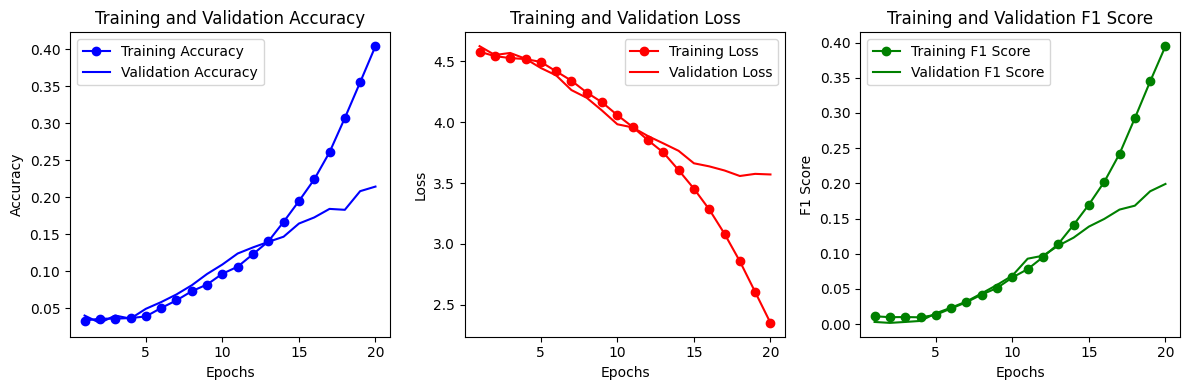

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
f1_score = history.history['f1_score']
val_f1_score = history.history['val_f1_score']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(epochs, loss, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(epochs, f1_score, 'go-', label='Training F1 Score')
plt.plot(epochs, val_f1_score, 'g-', label='Validation F1 Score')
plt.title('Training and Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import f1_score, classification_report

predictions = model.predict(test_generator, steps=len(test_generator))
predicted_classes = np.argmax(predictions, axis=1)

test_generator.reset()
true_classes = test_generator.classes


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 384ms/step


In [ ]:
f1_weighted = f1_score(true_classes, predicted_classes, average='weighted')
print("Weighted F1 Score : ", f1_weighted)

f1_micro = f1_score(true_classes, predicted_classes, average='micro')
print("Micro F1 Score : ", f1_micro)

f1_macro = f1_score(true_classes, predicted_classes, average='macro')
print("Macro F1 Score : ", f1_macro)


Weighted F1 Score :  0.1708690339668212
Micro F1 Score :  0.1907481439177613
Macro F1 Score :  0.14968784783744152


In [ ]:
final_val_loss = history.history['val_loss'][-1]
print("Final validation loss:", final_val_loss)


Final validation loss: 3.5701889991760254


In [ ]:
class_names = list(test_generator.class_indices.keys())
report = classification_report(true_classes, predicted_classes, target_names=class_names)
print(report)

                                                       precision    recall  f1-score   support

                                 acanthosis nigricans       0.12      0.10      0.11        10
                                                 acne       0.08      0.05      0.06        19
                                        acne vulgaris       0.26      0.32      0.29        34
acquired autoimmune bullous diseaseherpes gestationis       0.00      0.00      0.00         7
                         acrodermatitis enteropathica       0.33      0.60      0.43        10
                                    actinic keratosis       0.12      0.11      0.12        18
                          allergic contact dermatitis       0.06      0.09      0.07        44
                                        aplasia cutis       1.00      0.25      0.40         8
                                 basal cell carcinoma       0.25      0.47      0.33        47
                     basal cell carcinoma morphei

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 11. Now we will try with random data augmentation

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
val_datagen = ImageDataGenerator (rescale=1./255)
test_datagen = ImageDataGenerator (rescale=1./255)


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(290, 192),
                                                    batch_size=64,
                                                    class_mode= 'categorical'
                                                    )

validation_generator = val_datagen.flow_from_directory (val_dir,
                                                        target_size=(290, 192),
                                                         batch_size=64,
                                                         class_mode='categorical',
                                                         shuffle=False)

test_generator = test_datagen.flow_from_directory (test_dir,
                                                        target_size=(290, 192),
                                                         batch_size=64,
                                                         class_mode='categorical',
                                                         shuffle=False)


Found 12337 images belonging to 114 classes.
Found 2421 images belonging to 114 classes.
Found 1751 images belonging to 114 classes.


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(Dropout(0.25))
model.add(layers.Conv2D(256, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(Dropout(0.3))
model.add(layers.Conv2D(512, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(Dropout(0.35))
model.add(layers.Conv2D(1024, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(Dropout(0.4))
model.add(layers.Conv2D(2048, (3,3), activation = 'relu', input_shape = (290, 192, 3), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(Dropout(0.4))
model.add(layers.Dense(114, activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.metrics import F1Score

model.compile(loss='categorical_crossentropy',
              #optimizer=optimizers.RMSprop(learning_rate=1e-4),
              optimizer = optimizers.Adam(1e-4),
              metrics=['accuracy', F1Score(average='weighted', name = "f1_score")])

es = EarlyStopping(monitor='val_loss', mode='min', patience=2,  restore_best_weights=True)

In [ ]:
history = model.fit(
    train_generator,    epochs = 20,
    validation_data = validation_generator,
    verbose=1,
    callbacks=[es])

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


193/193 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - accuracy: 0.0304 - f1_score: 0.0083 - loss: 4.6181 - val_accuracy: 0.0401 - val_f1_score: 0.0031 - val_loss: 4.5861
Epoch 2/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 197s 983ms/step - accuracy: 0.0414 - f1_score: 0.0156 - loss: 4.5372 - val_accuracy: 0.0401 - val_f1_score: 0.0031 - val_loss: 4.5448
Epoch 3/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 196s 979ms/step - accuracy: 0.0352 - f1_score: 0.0092 - loss: 4.5377 - val_accuracy: 0.0401 - val_f1_score: 0.0031 - val_loss: 4.5436
Epoch 4/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 195s 976ms/step - accuracy: 0.0378 - f1_score: 0.0090 - loss: 4.5259 - val_accuracy: 0.0405 - val_f1_score: 0.0038 - val_loss: 4.4996
Epoch 5/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 196s 979ms/step - accuracy: 0.0328 - f1_score: 0.0115 - loss: 4.5107 - val_accuracy: 0.0388 - val_f1_score: 0.0054 - val_loss: 4.4796
Epoch 6/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 195s 977ms/step - accuracy: 0.0389 - f1_score: 0.0131 - loss: 4.4863 - val_accuracy: 0.0421 - val_f1_sco

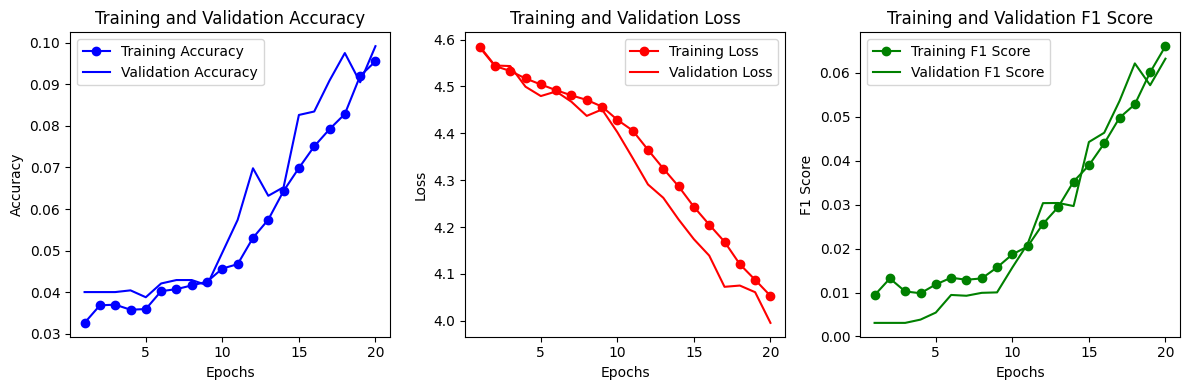

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
f1_score = history.history['f1_score']
val_f1_score = history.history['val_f1_score']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(epochs, loss, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(epochs, f1_score, 'go-', label='Training F1 Score')
plt.plot(epochs, val_f1_score, 'g-', label='Validation F1 Score')
plt.title('Training and Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import f1_score, classification_report

predictions = model.predict(test_generator, steps=len(test_generator))
predicted_classes = np.argmax(predictions, axis=1)

test_generator.reset()
true_classes = test_generator.classes


28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 260ms/step


In [ ]:
f1_weighted = f1_score(true_classes, predicted_classes, average='weighted')
print("Weighted F1 Score : ", f1_weighted)

f1_micro = f1_score(true_classes, predicted_classes, average='micro')
print("Micro F1 Score : ", f1_micro)

f1_macro = f1_score(true_classes, predicted_classes, average='macro')
print("Macro F1 Score : ", f1_macro)


Weighted F1 Score :  0.05980045004820896
Micro F1 Score :  0.10051399200456881
Macro F1 Score :  0.03457236656542832


In [ ]:
final_val_loss = history.history['val_loss'][-1]
print("Final validation loss:", final_val_loss)


Final validation loss: 3.995447874069214


In [ ]:
class_names = list(test_generator.class_indices.keys())
report = classification_report(true_classes, predicted_classes, target_names=class_names)
print(report)

                                                       precision    recall  f1-score   support

                                 acanthosis nigricans       0.00      0.00      0.00        10
                                                 acne       0.00      0.00      0.00        19
                                        acne vulgaris       0.12      0.50      0.19        34
acquired autoimmune bullous diseaseherpes gestationis       0.00      0.00      0.00         7
                         acrodermatitis enteropathica       0.00      0.00      0.00        10
                                    actinic keratosis       1.00      0.06      0.11        18
                          allergic contact dermatitis       0.00      0.00      0.00        44
                                        aplasia cutis       0.00      0.00      0.00         8
                                 basal cell carcinoma       0.14      0.36      0.21        47
                     basal cell carcinoma morphei

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
